# Credit Risk Modeling – All Tasks (10 Academy Week 5)

 ## Task 1: Credit Scoring Business Understanding

### **Q1: How does Basel II influence the need for interpretable models?**

-Basel II emphasizes transparent and risk-sensitive models.

- Banks must explain model outcomes to regulators and auditors.

- Hence, interpretable models (e.g., logistic regression + WoE) are preferred.

### **Q2: Why do we create a proxy variable for default?**

- No real "default" label is provided.

- We define high-risk clusters using behavior (low RFM).

- Risk: Proxy labels may be inaccurate → can affect fairness & reliability.

### **Q3: Trade-off between interpretable vs complex models?**

- Logistic regression → interpretable, accepted in regulated domains.

- Gradient Boosting → higher performance but harder to explain.

- In regulated environments, transparency > pure accuracy.

## Task 2: Exploratory Data Analysis (EDA)

In [61]:
# Importing required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
%matplotlib inline

In [63]:
# mounting drive and getting a csv

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
# Replace 'data.csv' with the actual path to your CSV file in Google Drive
csv_file_path = '/content/drive/MyDrive/kaim 6/week5/data.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
print(df.head())

         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
1  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6   
2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   
3   CustomerId_988          UGX          256  ProviderId_1  ProductId_21   
4   CustomerId_988          UGX          256  ProviderId_4   ProductId_6   

      ProductCategory    ChannelId   Amount  Value  TransactionStart

In [65]:
# Basic overview
print("Shape:", df.shape)
print("Columns:", df.columns)
print("Missing values:\n", df.isnull().sum())
print("Data types:\n", df.dtypes)

Shape: (95662, 16)
Columns: Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')
Missing values:
 TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64
Data types:
 TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int6

In [66]:
# Summary statistics
print(df.describe())

       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000


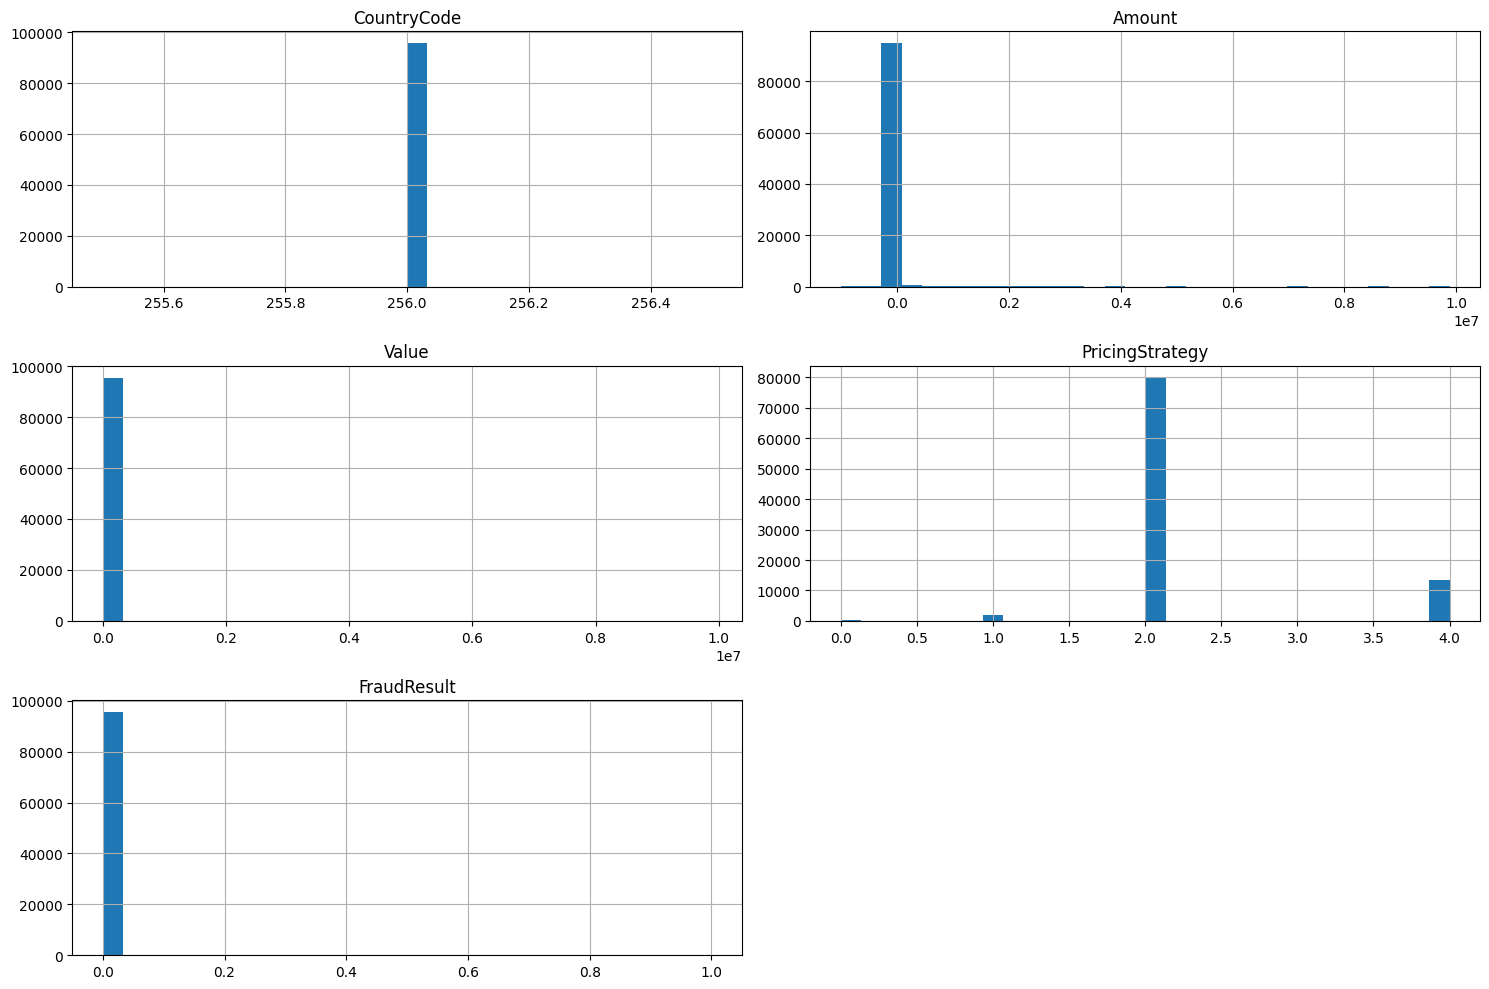

In [67]:
# Distribution of numeric columns
df.select_dtypes(include='number').hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

In [68]:
# Categorical feature distribution
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\n{col} value counts:\n", df[col].value_counts().head(10))

# Correlation heatmap
plt.figure(figsize=(12, 8))
numerical_cols = df.select_dtypes(include='number').columns
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


TransactionId value counts:
 TransactionId
TransactionId_35670     1
TransactionId_76871     1
TransactionId_73770     1
TransactionId_26203     1
TransactionId_380       1
TransactionId_28195     1
TransactionId_23223     1
TransactionId_118063    1
TransactionId_100640    1
TransactionId_51905     1
Name: count, dtype: int64

BatchId value counts:
 BatchId
BatchId_67019     28
BatchId_51870     16
BatchId_113893    14
BatchId_127204    12
BatchId_116835    10
BatchId_88001      9
BatchId_110084     7
BatchId_49408      7
BatchId_4233       6
BatchId_66085      6
Name: count, dtype: int64

AccountId value counts:
 AccountId
AccountId_4841    30893
AccountId_4249     4457
AccountId_4840     1738
AccountId_3206     1105
AccountId_318      1070
AccountId_10        965
AccountId_3595      465
AccountId_751       411
AccountId_2648      359
AccountId_2314      356
Name: count, dtype: int64

SubscriptionId value counts:
 SubscriptionId
SubscriptionId_3829    32630
SubscriptionId_4429     4

/tmp/ipython-input-69-2644927788.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index[:10], palette='viridis') # Top 10 categories


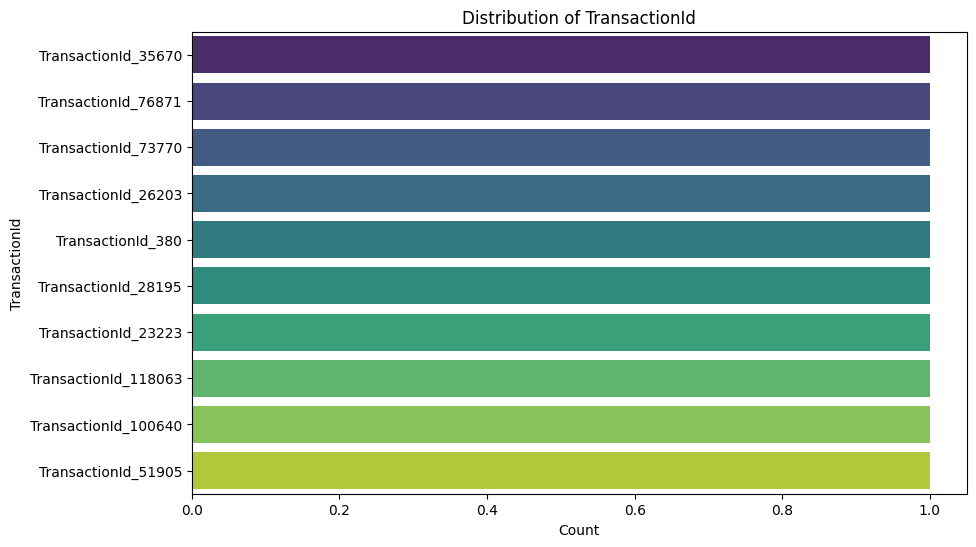

/tmp/ipython-input-69-2644927788.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index[:10], palette='viridis') # Top 10 categories


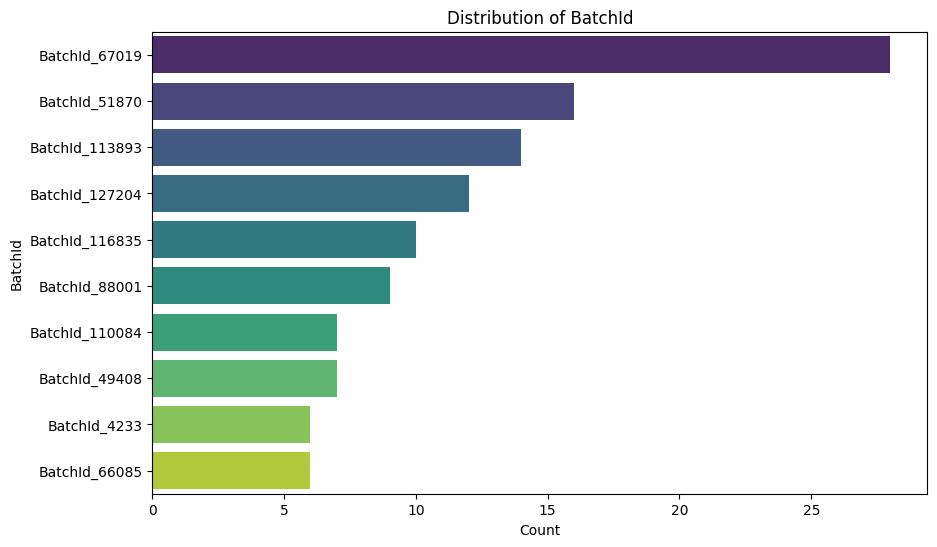

/tmp/ipython-input-69-2644927788.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index[:10], palette='viridis') # Top 10 categories


/tmp/ipython-input-69-2644927788.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index[:10], palette='viridis') # Top 10 categories


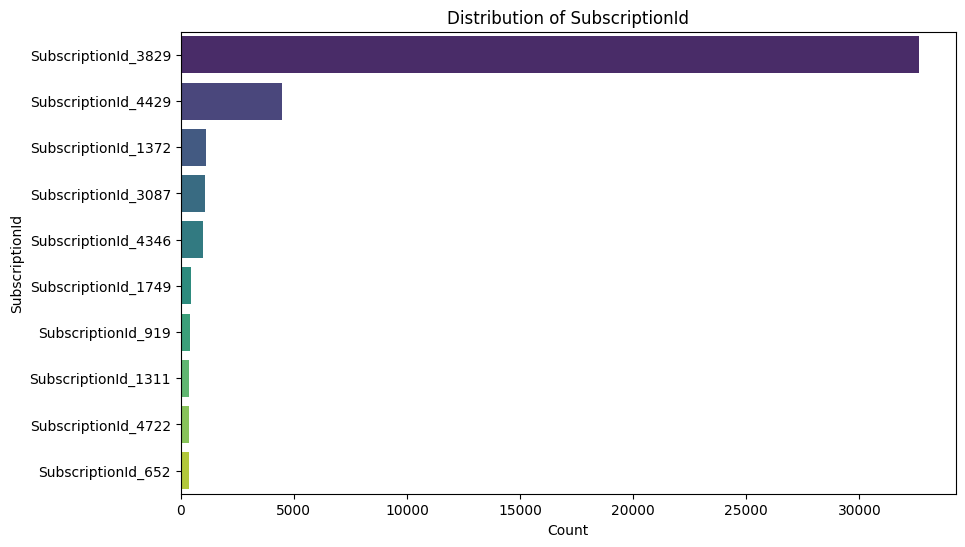

/tmp/ipython-input-69-2644927788.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index[:10], palette='viridis') # Top 10 categories


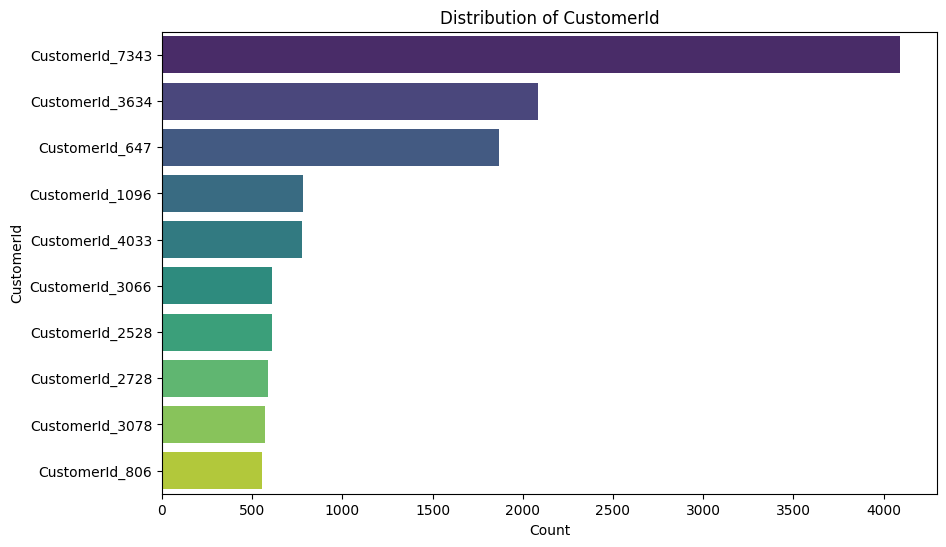

/tmp/ipython-input-69-2644927788.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index[:10], palette='viridis') # Top 10 categories


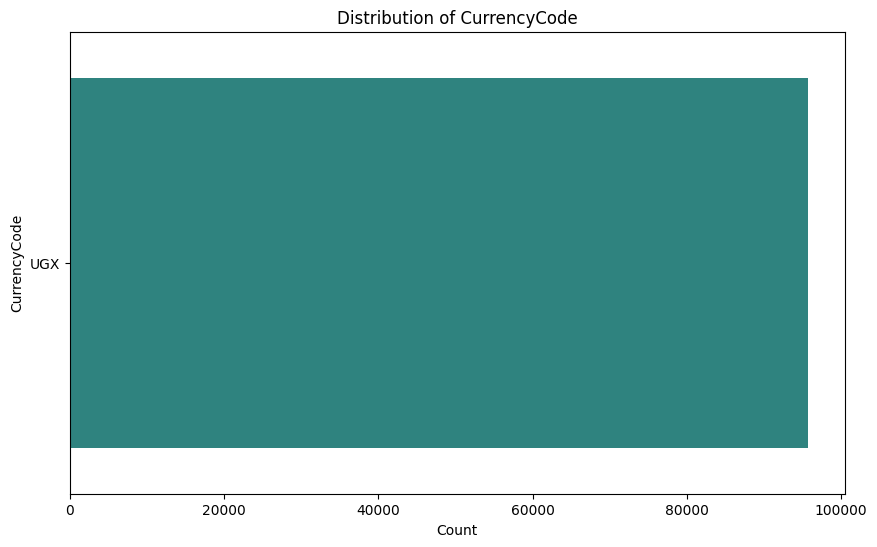

/tmp/ipython-input-69-2644927788.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index[:10], palette='viridis') # Top 10 categories


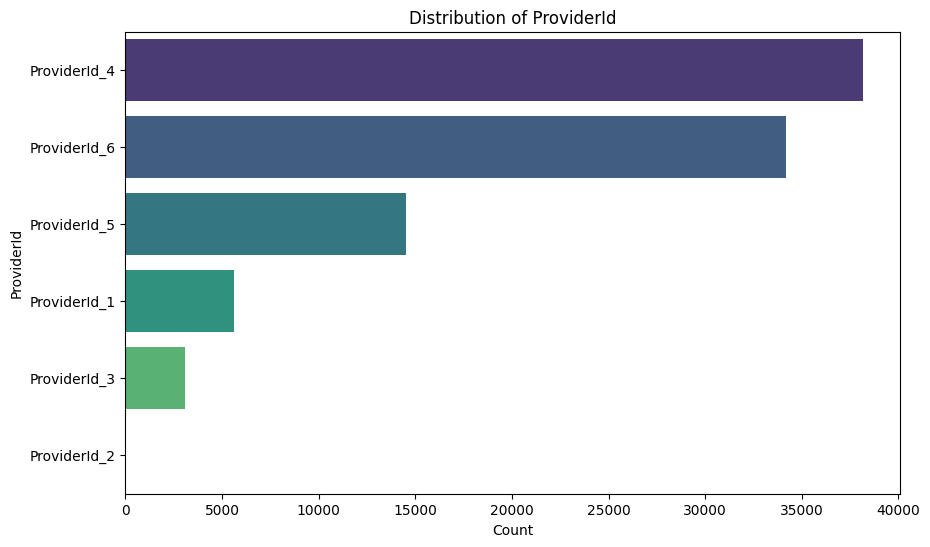

/tmp/ipython-input-69-2644927788.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index[:10], palette='viridis') # Top 10 categories


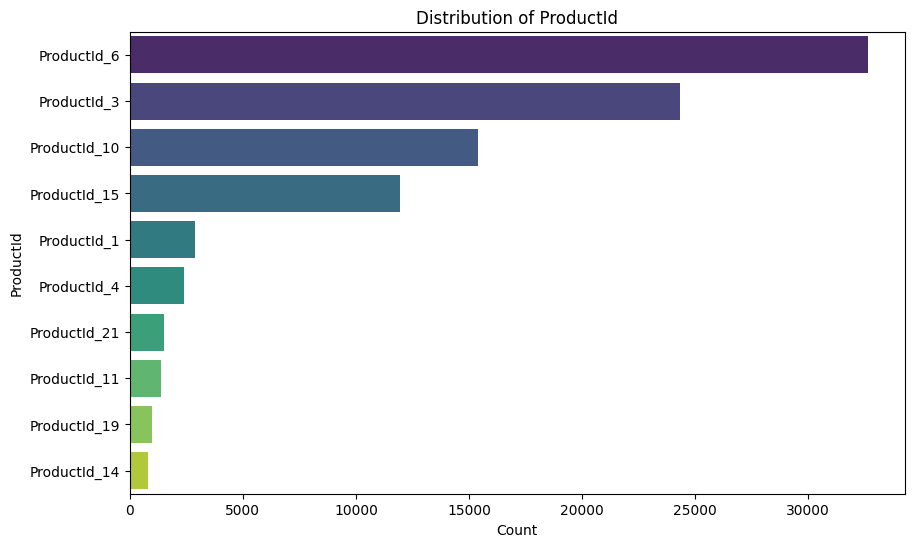

/tmp/ipython-input-69-2644927788.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index[:10], palette='viridis') # Top 10 categories


/tmp/ipython-input-69-2644927788.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index[:10], palette='viridis') # Top 10 categories


/tmp/ipython-input-69-2644927788.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index[:10], palette='viridis') # Top 10 categories


In [69]:
# Analyzing the distribution of categorical features provides insights into the frequency and variability of categories.

# Visualize categorical feature distribution (optional)
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index[:10], palette='viridis') # Top 10 categories
    plt.title(f"Distribution of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.show()

In [70]:
# Visualize outliers using box plots for numerical columns
numerical_cols = df.select_dtypes(include='number').columns
n_cols = 3 # Number of columns in the subplot grid
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols # Calculate required rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten() # Flatten the axes array for easy iteration

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_xlabel(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Task 3: Feature Engineering

- We’ll engineer aggregates and time features.

- We'll use woe package to encode categorical variables like ProductCategory.

- This encoding maintains interpretability for logistic regression or tree models.


In [71]:
!pip install xverse woe scikit-learn

In [72]:
# Import required libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [73]:
# Extract time features
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])
df['hour'] = df['TransactionStartTime'].dt.hour
df['month'] = df['TransactionStartTime'].dt.month

# Aggregate features per customer
agg = df.groupby('CustomerId').agg({
    'Amount': ['sum', 'mean', 'count'],
    'Value': 'std'
}).reset_index()
agg.columns = ['CustomerId', 'total_amt', 'avg_amt', 'txn_count', 'std_val']

# Define features for pipeline
num_features = ['total_amt', 'avg_amt', 'txn_count', 'std_val']
cat_features = ['ProductCategory']

# Build preprocessing pipeline
preprocessor = ColumnTransformer([
    ("num", Pipeline([
        ("imputer", SimpleImputer(strategy='mean')),
        ("scaler", StandardScaler())]), num_features),
    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy='most_frequent')),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))]), cat_features)
])


In [74]:
# To check the structure and steps of the pipeline, you can print it
print(preprocessor)

# To get the names of the transformers within the ColumnTransformer
print(preprocessor.transformers)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['total_amt', 'avg_amt', 'txn_count',
                                  'std_val']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['ProductCategory'])])
[('num', Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())]), ['total_amt', 'avg_amt', 'txn_count', 'std_val']), ('cat', Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'

# Task 4: Proxy Target Variable Engineering (RFM)

In [75]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [76]:
# Snapshot date for recency calculation
snapshot = df['TransactionStartTime'].max() + pd.Timedelta(days=1)

# Calculate RFM metrics
rfm = df.groupby('CustomerId').agg({
    'TransactionStartTime': lambda x: (snapshot - x.max()).days,
    'TransactionId': 'count',
    'Amount': 'sum'
}).reset_index()
rfm.columns = ['CustomerId', 'Recency', 'Frequency', 'Monetary']

# Normalize RFM
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Identify high-risk cluster (lowest frequency)
low_freq_cluster = rfm.groupby('Cluster')['Frequency'].mean().idxmin()

# Label high-risk customers
rfm['is_high_risk'] = (rfm['Cluster'] == low_freq_cluster).astype(int)

display(rfm.head())


CustomerId  Recency  Frequency  Monetary  Cluster  is_high_risk
0     CustomerId_1       84          1  -10000.0        0             1
1    CustomerId_10       84          1  -10000.0        0             1
2  CustomerId_1001       90          5   20000.0        0             1
3  CustomerId_1002       26         11    4225.0        2             0
4  CustomerId_1003       12          6   20000.0        2             0

## **VISUALIZATION**

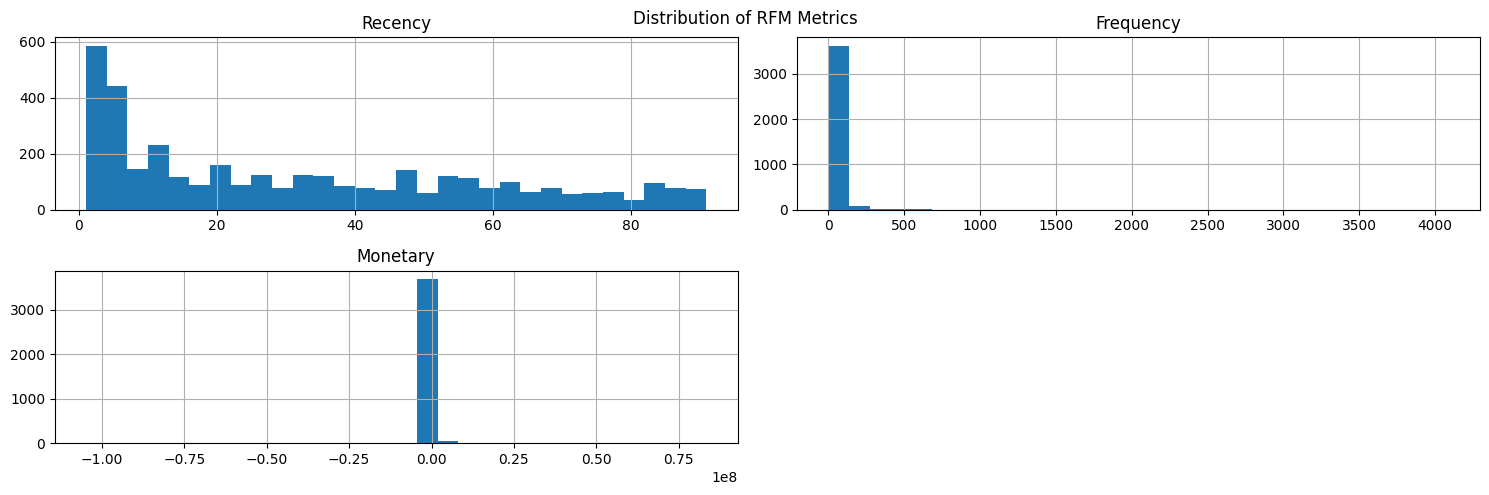

In [77]:
# Visualize RFM distributions
rfm[['Recency', 'Frequency', 'Monetary']].hist(figsize=(15, 5), bins=30)
plt.tight_layout()
plt.suptitle('Distribution of RFM Metrics')
plt.show()

In [78]:
# Visualize RFM clusters in 3D
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm['Recency'], rfm['Frequency'], rfm['Monetary'], c=rfm['Cluster'], cmap='viridis', s=50)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('RFM Clusters (3D)')
plt.show()


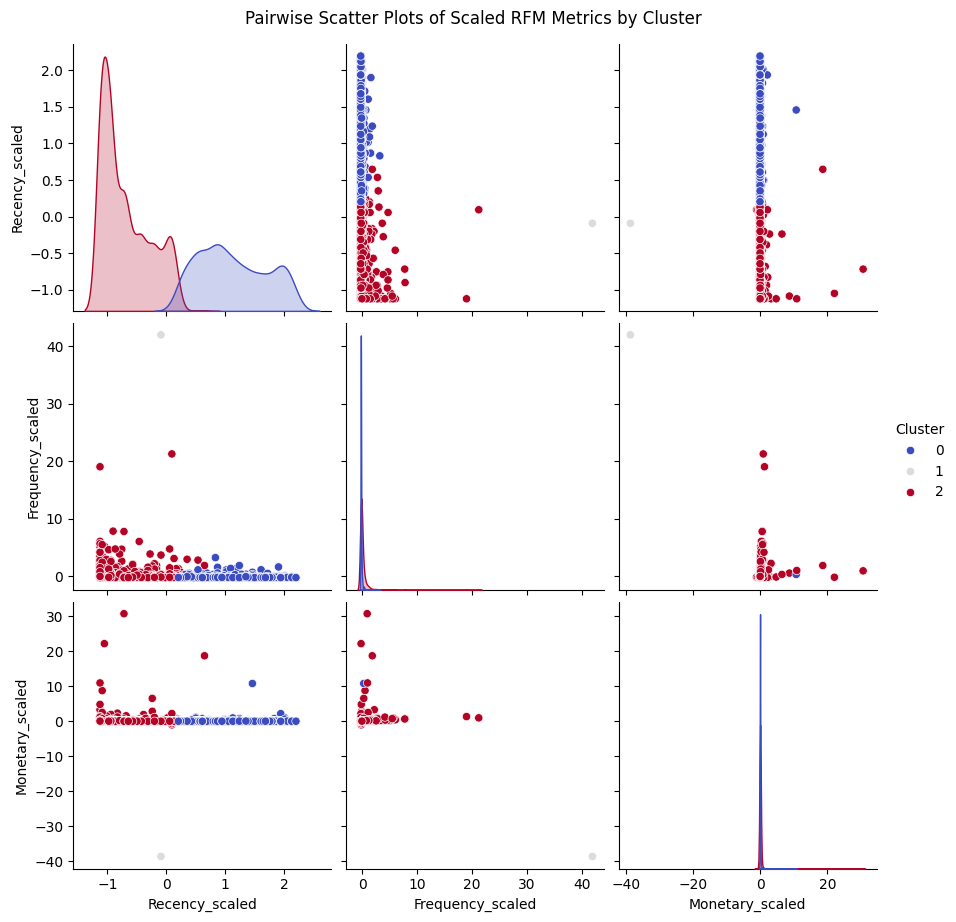

In [79]:
# Visualize clusters using pairwise scatter plots (using scaled data)
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled'])
rfm_scaled_df['Cluster'] = rfm['Cluster']

# Use pairplot with customized subplot size and color
g = sns.pairplot(
    rfm_scaled_df,
    hue='Cluster',
    palette='coolwarm',  # Changed from 'viridis' to 'coolwarm'
    vars=['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled'],
    height=3,      # Each subplot is 3 inches tall
    aspect=1    # Width-to-height ratio
)

# Set the overall title
g.fig.suptitle('Pairwise Scatter Plots of Scaled RFM Metrics by Cluster', y=1.02)
plt.show()


/tmp/ipython-input-80-2338162255.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='Cluster', palette='viridis')


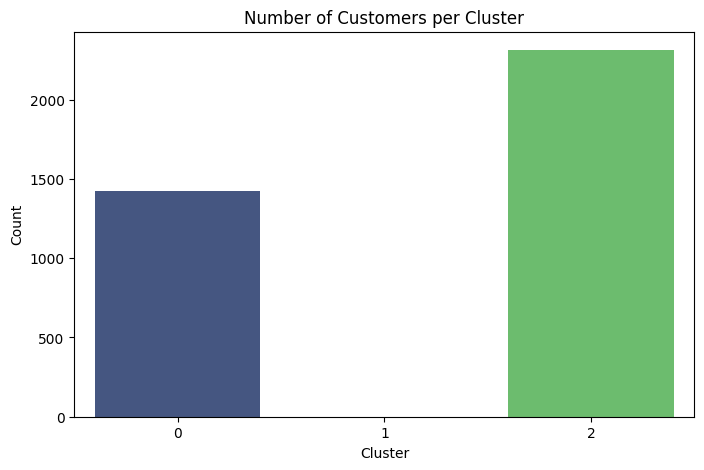

In [80]:
# Visualize the number of customers in each cluster
plt.figure(figsize=(8, 5))
sns.countplot(data=rfm, x='Cluster', palette='viridis')
plt.title('Number of Customers per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

In [81]:
# Visualize the distribution of the high-risk flag
plt.figure(figsize=(6, 4))
sns.countplot(data=rfm, x='is_high_risk', palette='viridis')
plt.title('Distribution of High-Risk Customers')
plt.xlabel('Is High Risk (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()


/tmp/ipython-input-81-1110163891.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='is_high_risk', palette='viridis')


In [82]:
rfm.to_csv('data_processed.csv', index=False)

# Task 5: Model Training

In [83]:
!pip install mlflow

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import mlflow
import mlflow.sklearn

# Merge aggregated features with risk label
merged = pd.merge(agg, rfm[['CustomerId', 'is_high_risk']], on='CustomerId')

X = merged.drop(['CustomerId', 'is_high_risk'], axis=1)
y = merged['is_high_risk']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Train RandomForest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict & evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Log model in MLflow
mlflow.sklearn.log_model(model, "rf_model")
mlflow.log_metric("f1_score", classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score'])


2025/06/30 19:37:16 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


              precision    recall  f1-score   support

           0       0.79      0.71      0.74       579
           1       0.59      0.69      0.63       357

    accuracy                           0.70       936
   macro avg       0.69      0.70      0.69       936
weighted avg       0.71      0.70      0.70       936



2025/06/30 19:37:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Training Random Forest...


2025/06/30 19:57:28 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


--- Random Forest Evaluation ---
              precision    recall  f1-score   support

           0       0.78      0.71      0.75       463
           1       0.59      0.67      0.63       286

    accuracy                           0.70       749
   macro avg       0.69      0.69      0.69       749
weighted avg       0.71      0.70      0.70       749

--------------------


2025/06/30 19:57:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


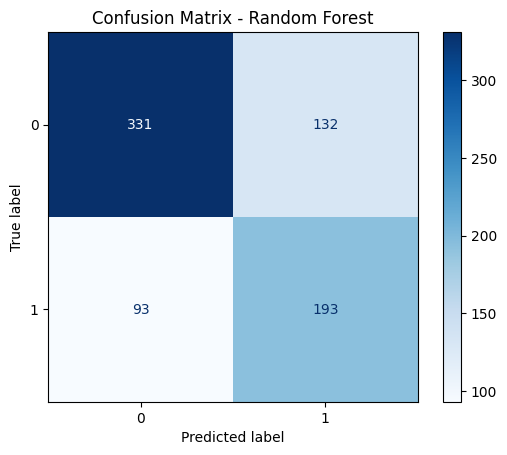


Training Logistic Regression...
--- Logistic Regression Evaluation ---
              precision    recall  f1-score   support

           0       0.86      0.47      0.60       463
           1       0.50      0.87      0.64       286

    accuracy                           0.62       749
   macro avg       0.68      0.67      0.62       749
weighted avg       0.72      0.62      0.62       749

--------------------


2025/06/30 19:57:33 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/06/30 19:57:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


2025/06/30 19:57:37 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.



Training Decision Tree...
--- Decision Tree Evaluation ---
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       463
           1       0.59      0.71      0.65       286

    accuracy                           0.70       749
   macro avg       0.69      0.70      0.69       749
weighted avg       0.72      0.70      0.70       749

--------------------


2025/06/30 19:57:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


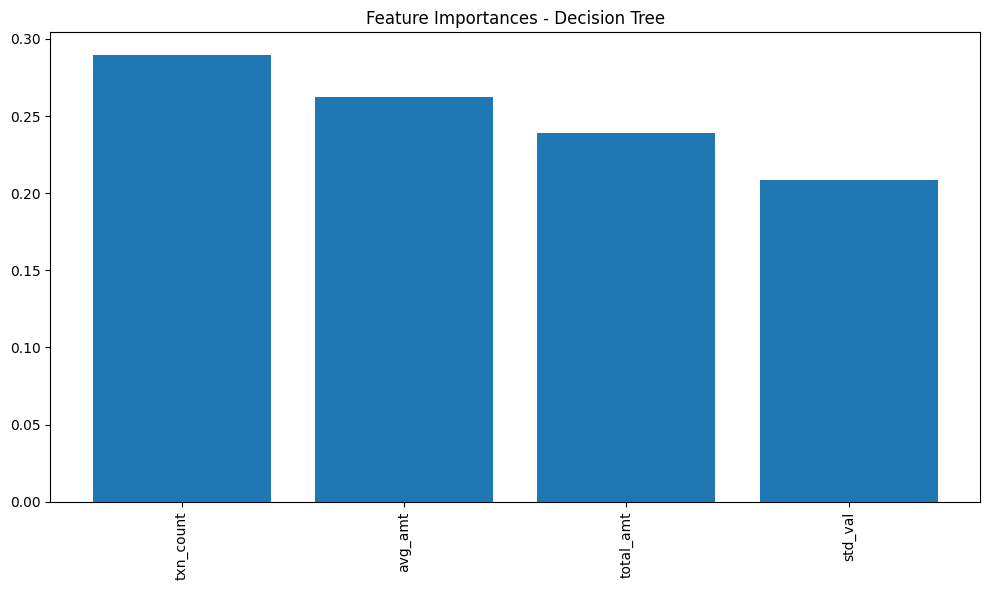


Training Gradient Boosting...


2025/06/30 19:57:42 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


--- Gradient Boosting Evaluation ---
              precision    recall  f1-score   support

           0       0.80      0.73      0.76       463
           1       0.62      0.71      0.66       286

    accuracy                           0.72       749
   macro avg       0.71      0.72      0.71       749
weighted avg       0.73      0.72      0.72       749

--------------------


2025/06/30 19:57:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


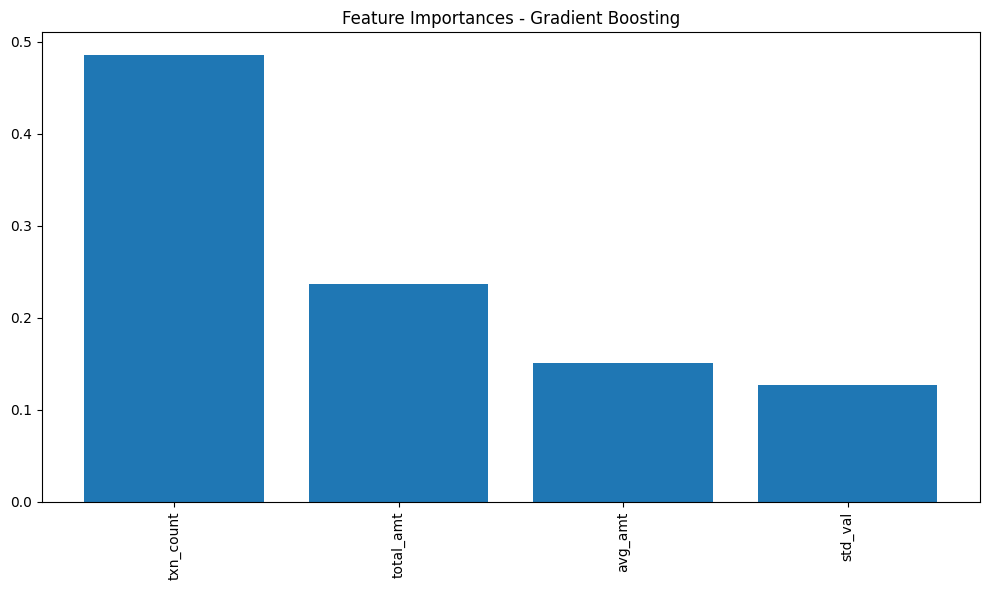


Best model is 'Gradient Boosting' with F1-score: 0.6591
Saved best model to 'best_model.pkl'

Summary of Results:
Random Forest: F1 Score = 0.6318, Accuracy = 0.6996
Logistic Regression: F1 Score = 0.6386, Accuracy = 0.6222
Decision Tree: F1 Score = 0.6456, Accuracy = 0.7009
Gradient Boosting: F1 Score = 0.6591, Accuracy = 0.7210


In [105]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import mlflow
import mlflow.sklearn
import joblib  # for saving models

# Define models with class_weight balanced where supported
models = {
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)  # no class_weight param
}

results = {}
best_f1 = -1
best_model = None
best_model_name = ""

# Merge aggregated features with risk label
merged = pd.merge(agg, rfm[['CustomerId', 'is_high_risk']], on='CustomerId')

X = merged.drop(['CustomerId', 'is_high_risk'], axis=1)
y = merged['is_high_risk']

# Handle missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split data once (to keep same test set across models)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, stratify=y, test_size=0.2, random_state=42
)

for name, model in models.items():
    with mlflow.start_run(run_name=name, nested=True):
        print(f"\nTraining {name}...")

        # Train model
        model.fit(X_train, y_train)

        # Predict
        y_pred = model.predict(X_test)

        # Evaluate
        report = classification_report(y_test, y_pred, output_dict=True)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        print(f"--- {name} Evaluation ---")
        print(classification_report(y_test, y_pred))
        print("-" * 20)

        # Store results
        results[name] = {
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1_score": f1,
            "report": report
        }

        # Log metrics
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("f1_score", f1)
        mlflow.log_text(str(report), "classification_report.txt")

        # Log model
        mlflow.sklearn.log_model(model, name.replace(" ", "_").lower() + "_model")

        # Plot confusion matrix
        disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.Blues)
        plt.title(f'Confusion Matrix - {name}')
        plt.show()

        # Check if best model so far
        if f1 > best_f1:
            best_f1 = f1
            best_model = model
            best_model_name = name

        if hasattr(model, "feature_importances_"):
            importances = model.feature_importances_
            feature_names = merged.drop(['CustomerId', 'is_high_risk'], axis=1).columns

            # Sort importances descending
            indices = importances.argsort()[::-1]

            plt.figure(figsize=(10, 6))
            plt.title(f"Feature Importances - {name}")
            plt.bar(range(len(importances)), importances[indices], align='center')
            plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
            plt.tight_layout()
            plt.show()


# Save the best model locally
if best_model is not None:
    save_path = "best_model.pkl"
    joblib.dump(best_model, save_path)
    print(f"\nBest model is '{best_model_name}' with F1-score: {best_f1:.4f}")
    print(f"Saved best model to '{save_path}'")
else:
    print("No model trained.")

# Summary
print("\nSummary of Results:")
for name, metrics in results.items():
    print(f"{name}: F1 Score = {metrics['f1_score']:.4f}, Accuracy = {metrics['accuracy']:.4f}")


In [106]:
# After the loop finishes and the best model is determined
best_model_name = None
best_f1_score = -1.0 # Initialize with a sufficiently low value

print("\nDetermining the best model based on F1 Score:")
for name, metrics in results.items():
    print(f"{name}: F1 Score = {metrics['f1_score']:.4f}")
    if metrics['f1_score'] > best_f1_score:
        best_f1_score = metrics['f1_score']
        best_model_name = name

print(f"\nBest Model: {best_model_name} with an F1 Score of {best_f1_score:.4f}")


# You can also retrieve the actual best model object if needed
best_model = models[best_model_name]


Determining the best model based on F1 Score:
Random Forest: F1 Score = 0.6318
Logistic Regression: F1 Score = 0.6386
Decision Tree: F1 Score = 0.6456
Gradient Boosting: F1 Score = 0.6591

Best Model: Gradient Boosting with an F1 Score of 0.6591


In [107]:
import joblib  # for saving models

# Save the best model locally
if best_model is not None:
    save_path = "best_model.pkl"
    joblib.dump(best_model, save_path)
    print(f"\nBest model is '{best_model_name}' with F1-score: {best_f1:.4f}")
    print(f"Saved best model to '{save_path}'")
else:
    print("No model trained.")


Best model is 'Gradient Boosting' with F1-score: 0.6591
Saved best model to 'best_model.pkl'
